In [35]:
import flammkuchen as fl
import numpy as np
import time
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

In [2]:
def create_random_data(chunk_size=10, planes=10, roi_x=300, roi_y=300):
    data = np.random.randint(low=0, high=65535, size=[chunk_size, planes, roi_x, roi_y], dtype=np.uint16)
    return data

In [74]:
def save(data, dialog= False):
    start = time.time_ns()
    fl.save(
        r"C:/Users/diego/python_code/h5_tests/0001.h5",
        {"stack_4D": data},
        compression=("blosc", 1),
    )
    end = time.time_ns()
    if dialog:
        print("Flammkuchen took {:.2f} seconds to save an array of shape {}".format((end - start) / 1000000000, data.shape))
    size = os.path.getsize(r"C:/Users/diego/python_code/h5_tests/0001.h5") / 1048576
    return (end - start) / 1000000000, size

In [79]:
n_samples = 10
chunk_sizes = np.arange(1, 11)
times = np.zeros([len(chunk_sizes), n_samples])
sizes = np.zeros([len(chunk_sizes), n_samples])
for i_size, chunk_size in enumerate(chunk_sizes):
    for epoch in range(n_samples):
        data = create_random_data(chunk_size, 30, 1028, 1028)
        times[i_size, epoch], sizes[i_size, epoch] = save(data)
    print("Data generated for chunk {}".format(i_size + 1))

Data generated for chunk 1
Data generated for chunk 2
Data generated for chunk 3
Data generated for chunk 4
Data generated for chunk 5
Data generated for chunk 6
Data generated for chunk 7
Data generated for chunk 8
Data generated for chunk 9
Data generated for chunk 10


<Figure size 432x288 with 0 Axes>

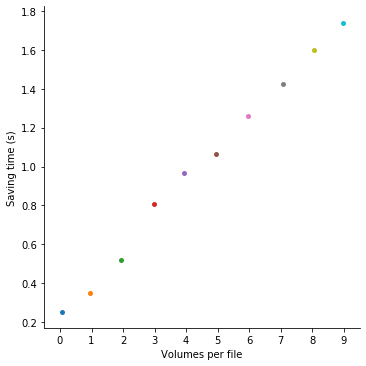

In [72]:
times_pd = pd.DataFrame(times)
times_pd = times_pd.transpose()
fig = plt.figure(1)
ax = sns.catplot(data=times_pd)
ax.set(xlabel='Volumes per file', ylabel='Saving time (s)')
plt.show()
ax.savefig("saving_speed_flammkuchen.png", dpi=150)

<Figure size 432x288 with 0 Axes>

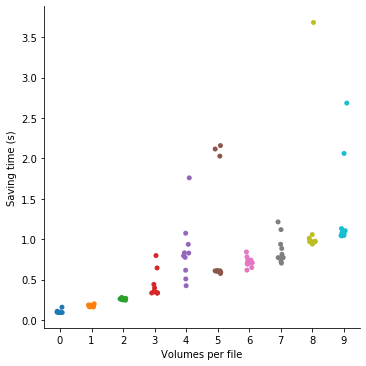

In [80]:
times_pd = pd.DataFrame(times)
times_pd = times_pd.transpose()
fig = plt.figure(1)
ax = sns.catplot(data=times_pd)
ax.set(xlabel='Volumes per file', ylabel='Saving time (s)')
plt.show()
ax.savefig("saving_speed_flammkuchen.png", dpi=150)

<Figure size 432x288 with 0 Axes>

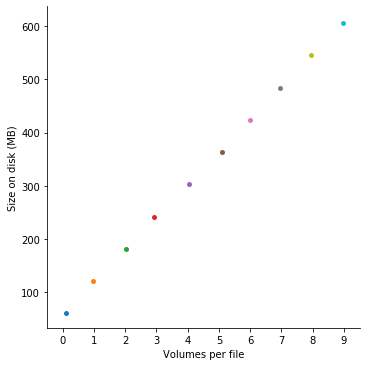

In [73]:
sizes_pd = pd.DataFrame(sizes)
sizes_pd = sizes_pd.transpose()
fig = plt.figure(2)
ax = sns.catplot(data=sizes_pd)
ax.set(xlabel='Volumes per file', ylabel='Size on disk (MB)')
plt.show()
ax.savefig("saving_size_flammkuchen.png", dpi=150)

<Figure size 432x288 with 0 Axes>

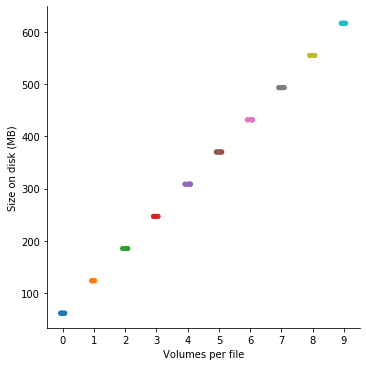

In [81]:
sizes_pd = pd.DataFrame(sizes)
sizes_pd = sizes_pd.transpose()
fig = plt.figure(2)
ax = sns.catplot(data=sizes_pd)
ax.set(xlabel='Volumes per file', ylabel='Size on disk (MB)')
plt.show()
ax.savefig("saving_size_flammkuchen.png", dpi=150)